<a href="https://colab.research.google.com/github/hayathhh/FACERECOGNITION/blob/main/facerecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np #pour manipuler les matrices et les tableaux multidimensionnels
import pandas as pd #pour manipuler et analyser les données 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV





In [2]:
def show_orignal_images(pixels):
	#Displaying Orignal Images
	fig, axes = plt.subplots(6, 10, figsize=(11, 7),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
	plt.show()

In [3]:
def show_eigenfaces(pca):
    fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
        ax.set_title("PC" + str(i+1))
    plt.show()

In [5]:
#read dataset and visualizite
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path = '/content/drive/MyDrive/data/face_data.csv'
df = pd.read_csv(path)


In [ ]:
df.shape

In [ ]:
print(df.head())

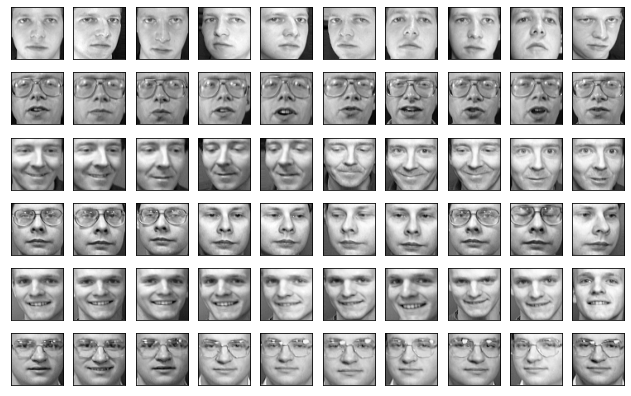

In [7]:
labels= df["target"]
pixels= df.drop(["target"],axis=1)
show_orignal_images(pixels)

In [8]:
## Step 2: Split Dataset into training and testing
#on divise notre data en deux catégories training data et testing data ,cette méthode est utiliser lorsque on'a une seule data
x_train, x_test, y_train, y_test = train_test_split(pixels,labels)

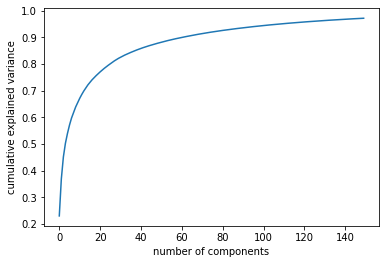

In [9]:
## Step 3: Perform PCA.

pca = PCA(n_components=150).fit(x_train)
#cette fctn nous aide de selectionner les  k meilleurs eigen faces pour représenter training set
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()


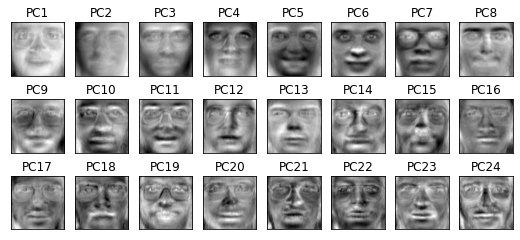

In [10]:
show_eigenfaces(pca)

In [11]:
print("Projecting the input data on the eigenfaces orthonormal basis")
Xtrain_pca = pca.transform(x_train)

Projecting the input data on the eigenfaces orthonormal basis


In [12]:
print("Fitting the classifier to the training set")
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(Xtrain_pca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.0001,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [13]:
## Step 5: create a SVM Classifer and fit training data
clf = SVC(kernel='rbf',C=1000,gamma=0.001)
#Train the model using the training sets
clf = clf.fit(Xtrain_pca, y_train) 
#apply pca to testing sets 
Xtest_pca = pca.transform(x_test)
#Predict the response for test dataset
y_pred = clf.predict(Xtest_pca)# 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         0
           4       1.00      0.75      0.86         4
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         3
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         5
          12       1.00      0.75      0.86         4
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         1
          15       0.50      1.00      0.67         1
          16       1.00      1.00      1.00         4
          17       0.67      1.00      0.80         2
          18       1.00      1.00      1.00         1
          20       1.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


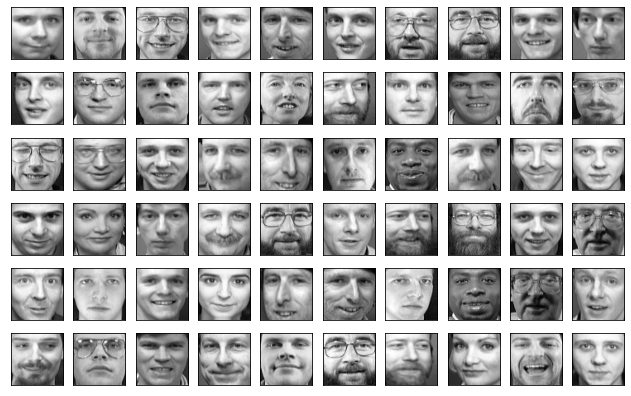


************************** Images after reconstuction****************************



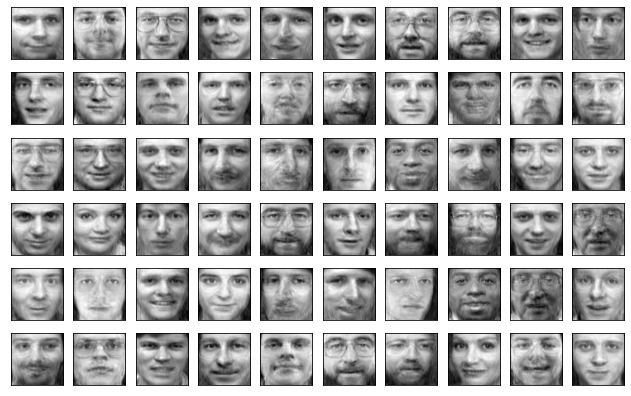

In [14]:
Xtest_pca = pca.transform(x_test)
projected = pca.inverse_transform(Xtest_pca)
show_orignal_images(x_test)

print('\n************************** Images after reconstuction****************************\n')
show_orignal_images(projected )